In [ ]:
!python --version

Python 3.12.12


In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn opencv-python pytesseract pdf2image


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
uci = pd.read_csv('/content/drive/MyDrive/heart_disease_project/data/raw/uci_heart.csv')
fram = pd.read_csv('/content/drive/MyDrive/heart_disease_project/data/raw/framingham.csv')


In [ ]:
uci.info()
uci.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
for col in uci.columns:
    if uci[col].dtype != 'object':
        uci[col].fillna(uci[col].median(), inplace=True)
    else:
        uci[col].fillna(uci[col].mode()[0], inplace=True)


/tmp/ipython-input-3710301715.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uci[col].fillna(uci[col].median(), inplace=True)
/tmp/ipython-input-3710301715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
numerical_cols_df = uci.select_dtypes(include=np.number)
Q1 = numerical_cols_df.quantile(0.25)
Q3 = numerical_cols_df.quantile(0.75)
IQR = Q3 - Q1
uci_clean = uci[~((numerical_cols_df < (Q1 - 1.5 * IQR)) | (numerical_cols_df > (Q3 + 1.5 * IQR))).any(axis=1)]

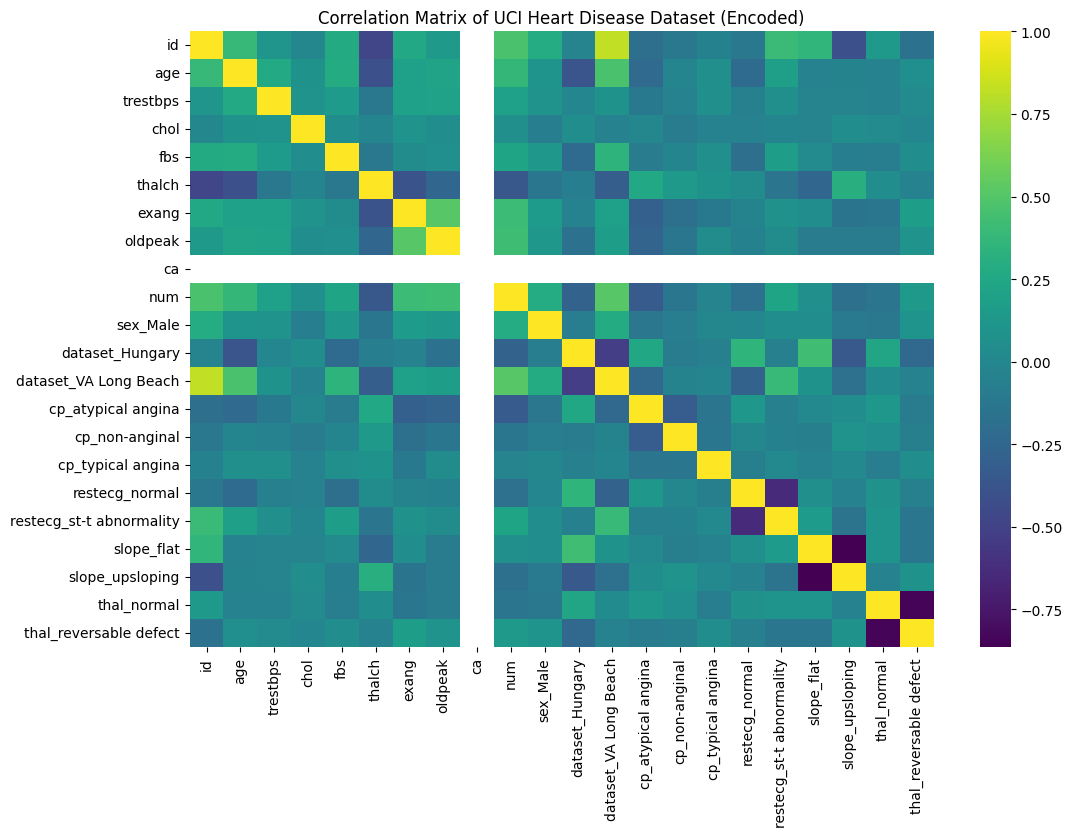

In [ ]:
uci_encoded = pd.get_dummies(uci_clean, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(uci_encoded.corr(), annot=False, cmap='viridis')
plt.title('Correlation Matrix of UCI Heart Disease Dataset (Encoded)')
plt.show()

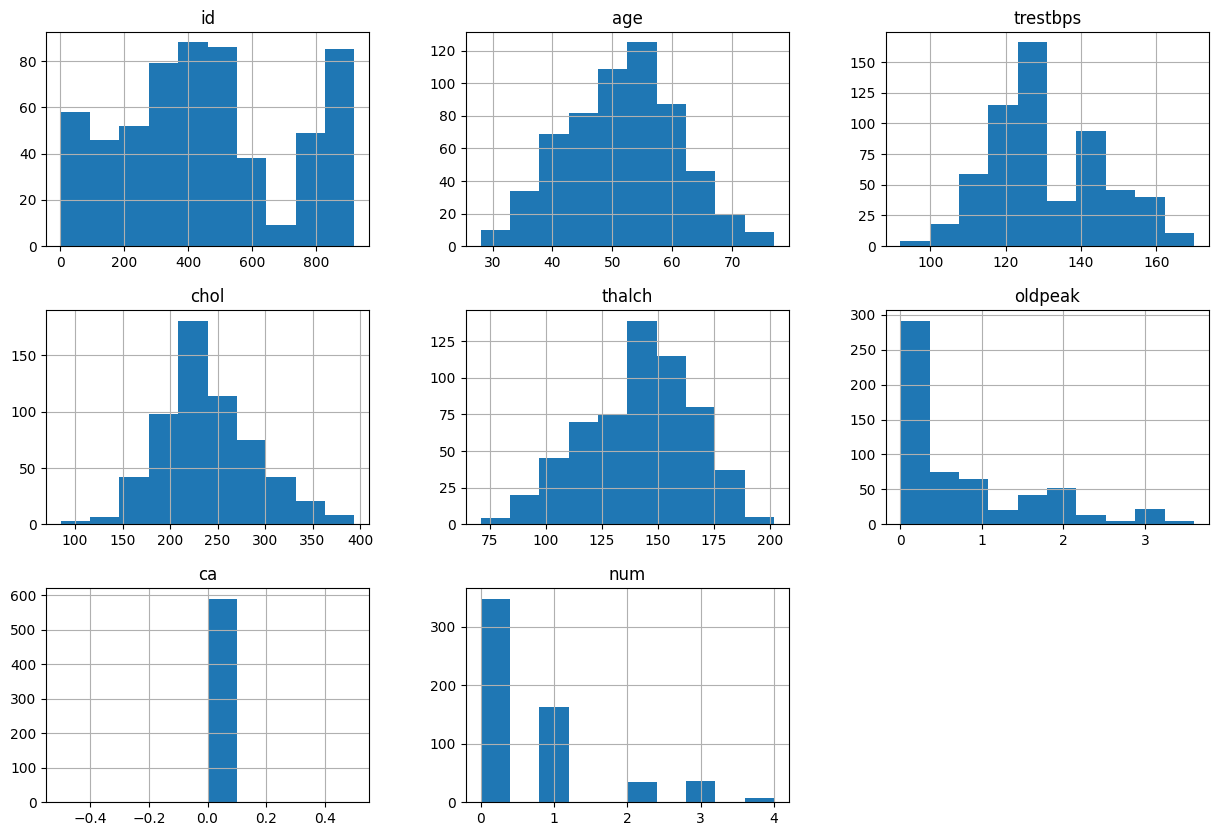

In [ ]:
uci_clean.hist(figsize=(15, 10))
plt.show()


In [ ]:
uci_clean.to_csv('/content/drive/MyDrive/heart_disease_project/data/processed/uci_clean.csv', index=False)


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
import pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [7]:
!pip install pdf2image
!sudo apt-get install poppler-utils
from pdf2image import convert_from_path

pages = convert_from_path('/content/drive/MyDrive/heart_disease_project/ocr_samples/sample.pdf')
pages[0].save('page1.jpg', 'JPEG')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [8]:
import cv2

img = cv2.imread('page1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
denoised = cv2.medianBlur(gray, 3)
threshold = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cv2.imwrite('cleaned.jpg', threshold)


True

In [11]:
!pip install pytesseract
import pytesseract
text = pytesseract.image_to_string('cleaned.jpg')
print(text)

<class 'pandas.core.frame.DataFrame'>
Rangelndex: 920 entries, 0 to 919
Data columns (total 16 columns):

# Column Non-Null Count Dtype
0 id 920 non-null inté4

1 age 920non-null int6é4

2 sex 920non-null object

3 dataset 920 non-null object

4 cp 920 non-null object

5 trestbps 861 non-null float6é4
6 chol 890non-null float64

7 fbs  830non-null object

8 restecg 918non-null object

9 thalch 865 non-null float64
10 exang 865non-null object
11 oldpeak 858 non-null float64
12 slope 611 non-null object
13 ca 309 non-null float6é4

14 thal 434non-null object

15 num = 920 non-null inté4
dtypes: float64(5), int64(3), object(8)

memory usage: 115.1+ KB

0
id 0
age 0
sex 0
dataset 0

cp 0



In [13]:
import re

bp = re.findall(r'Blood Pressure[:\s]*([0-9/]+)', text)
cholesterol = re.findall(r'Cholesterol[:\s]*([0-9]+)', text)

print("BP:", bp)
print("Cholesterol:", cholesterol)


BP: []
Cholesterol: []


In [25]:
import pandas as pd
import numpy as np # Import numpy
uci = pd.read_csv('/content/drive/MyDrive/heart_disease_project/data/raw/uci_heart.csv')

for col in uci.columns:
    if uci[col].dtype != 'object':
        uci[col].fillna(uci[col].median(), inplace=True)
    else:
        uci[col].fillna(uci[col].mode()[0], inplace=True)

numerical_cols_df = uci.select_dtypes(include=np.number)
Q1 = numerical_cols_df.quantile(0.25)
Q3 = numerical_cols_df.quantile(0.75)
IQR = Q3 - Q1
uci_clean = uci[~((numerical_cols_df < (Q1 - 1.5 * IQR)) | (numerical_cols_df > (Q3 + 1.5 * IQR))).any(axis=1)].copy() # Added .copy()

from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalch'] # Corrected 'thalach' to 'thalch'
scaler = StandardScaler()
# ----------------------------
# HANDLE HEAVILY MISSING COLUMNS
# ----------------------------

# Check missing values again (optional)
print(uci_clean.isnull().sum())

# Drop 'ca' – too many missing values (66%)
if 'ca' in uci_clean.columns:
    uci_clean = uci_clean.drop(columns=['ca'])

# Handle 'thal' – keep but fill missing
if 'thal' in uci_clean.columns:
    uci_clean['thal'] = uci_clean['thal'].fillna('unknown')

# Handle 'slope' – keep but mark unknown
if 'slope' in uci_clean.columns:
    uci_clean['slope'] = uci_clean['slope'].fillna('unknown')

# Impute remaining numeric missing values (median)
num_cols = uci_clean.select_dtypes(include=['float64', 'int64']).columns
uci_clean[num_cols] = uci_clean[num_cols].fillna(uci_clean[num_cols].median())

# Impute remaining categorical missing values (mode)
cat_cols = uci_clean.select_dtypes(include=['object']).columns
uci_clean[cat_cols] = uci_clean[cat_cols].fillna(uci_clean[cat_cols].mode().iloc[0])

uci_clean[num_cols] = scaler.fit_transform(uci_clean[num_cols])

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-1886236339.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uci[col].fillna(uci[col].median(), inplace=True)
/tmp/ipython-input-1886236339.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [26]:
from sklearn.model_selection import train_test_split
uci_encoded = pd.get_dummies(uci_clean, drop_first=True)
uci_encoded['risk_score'] = (
    (uci_encoded['age'] > 50).astype(int) +
    (uci_encoded['chol'] > 240).astype(int) +
    (uci_encoded['trestbps'] > 130).astype(int)
)
train, test = train_test_split(uci_encoded, test_size=0.30, random_state=42)
val, test = train_test_split(test, test_size=0.50, random_state=42)

len(train), len(val), len(test)

(413, 88, 89)